<a href="https://colab.research.google.com/github/CamiloLoaiza12/Analitica2_trabajo1/blob/main/Selecci%C3%B3n_de_variables_y_regularizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [1]:
## Remove Warnings
import warnings
warnings.filterwarnings("ignore")

## Data
import pandas as pd
import numpy as np
from itertools import product

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

## Modelling
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error, r2_score, classification_report
import math

In [2]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics

%matplotlib inline

In [3]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [4]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.datasets import make_classification
from collections import Counter

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

# Importacion de datos

Lecutra de tabla

In [6]:
tabla_base = pd.read_csv('tabla_base.csv', sep = ",")

Informacion de la tabla

In [7]:
tabla_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   desercion_año_anterior         4410 non-null   object 
 1   frecuencia_viajes              4410 non-null   object 
 2   departamento                   4410 non-null   object 
 3   distancia_domicilio            4410 non-null   int64  
 4   educacion                      4410 non-null   int64  
 5   formacion                      4410 non-null   object 
 6   nivel_de_cargo                 4410 non-null   int64  
 7   nombre_cargo                   4410 non-null   object 
 8   estado_civil                   4410 non-null   object 
 9   ingresos_mensuales             4410 non-null   int64  
 10  empresas_anteriores            4410 non-null   float64
 11  porcentaje_aumentosalario      4410 non-null   int64  
 12  nivel_de_opciones              4410 non-null   i

# Normalización

Variables numericas a categoricas

In [8]:
tablabase=tabla_base.copy()
columnascategoricas=["numero_capacitaciones","frecuencia_viajes"]
tablabase[columnascategoricas] = tablabase[columnascategoricas].astype(str)
tablabase.dtypes

desercion_año_anterior            object
frecuencia_viajes                 object
departamento                      object
distancia_domicilio                int64
educacion                          int64
formacion                         object
nivel_de_cargo                     int64
nombre_cargo                      object
estado_civil                      object
ingresos_mensuales                 int64
empresas_anteriores              float64
porcentaje_aumentosalario          int64
nivel_de_opciones                  int64
años_de_trabajo                  float64
numero_capacitaciones             object
años_jefe_actual                   int64
satisfaccion_entorno             float64
satisfaccion_laboral             float64
conciliacion_faimilar_laboral    float64
implicacion_laboral                int64
tiempo_prom_dia                  float64
dtype: object

Cambio de la variable respuesta, de object a int

In [9]:
tablabase["desercion"]=tablabase['desercion_año_anterior'].replace({'No':0, 'Yes':1})
del tablabase['desercion_año_anterior']
tablabase

,frecuencia_viajes,departamento,distancia_domicilio,educacion,formacion,nivel_de_cargo,nombre_cargo,estado_civil,ingresos_mensuales,empresas_anteriores,...,nivel_de_opciones,años_de_trabajo,numero_capacitaciones,años_jefe_actual,satisfaccion_entorno,satisfaccion_laboral,conciliacion_faimilar_laboral,implicacion_laboral,tiempo_prom_dia,desercion
0,Travel_Rarely,Sales,6,2,Life Sciences,1,Healthcare Representative,Married,131160,1.0,...,0,1.0,6,0,3.0,4.0,2.0,3,6.8702,0
1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Research Scientist,Single,41890,0.0,...,1,6.0,3,4,3.0,2.0,4.0,2,7.3160,1
2,Travel_Frequently,Research & Development,17,4,Other,4,Sales Executive,Married,193280,1.0,...,3,5.0,2,3,2.0,2.0,1.0,3,6.8161,0
3,Non-Travel,Research & Development,2,5,Life Sciences,3,Human Resources,Married,83210,3.0,...,3,13.0,5,5,4.0,4.0,3.0,2,6.7892,0
4,Travel_Rarely,Research & Development,10,1,Medical,1,Sales Executive,Single,23420,4.0,...,2,9.0,2,4,4.0,1.0,3.0,3,7.8776,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,Travel_Rarely,Research & Development,5,4,Medical,1,Research Scientist,Single,60290,3.0,...,1,10.0,5,2,4.0,1.0,3.0,3,8.3169,0
4406,Travel_Rarely,Research & Development,2,4,Medical,1,Laboratory Technician,Divorced,26790,2.0,...,0,10.0,2,2,4.0,4.0,3.0,2,5.8972,0
4407,Travel_Rarely,Research & Development,25,2,Life Sciences,2,Sales Executive,Married,37020,0.0,...,0,5.0,4,2,1.0,3.0,3.0,3,7.1495,0
4408,Travel_Rarely,Sales,18,2,Medical,1,Laboratory Technician,Divorced,23980,0.0,...,1,10.0,2,8,4.0,1.0,3.0,2,9.1876,0


Volviendo a dummies las variables categoricas predictoras

In [10]:
tablabase1=pd.get_dummies(tablabase)
tablabase1

,distancia_domicilio,educacion,nivel_de_cargo,ingresos_mensuales,empresas_anteriores,porcentaje_aumentosalario,nivel_de_opciones,años_de_trabajo,años_jefe_actual,satisfaccion_entorno,...,estado_civil_Divorced,estado_civil_Married,estado_civil_Single,numero_capacitaciones_0,numero_capacitaciones_1,numero_capacitaciones_2,numero_capacitaciones_3,numero_capacitaciones_4,numero_capacitaciones_5,numero_capacitaciones_6
0,6,2,1,131160,1.0,11,0,1.0,0,3.0,...,0,1,0,0,0,0,0,0,0,1
1,10,1,1,41890,0.0,23,1,6.0,4,3.0,...,0,0,1,0,0,0,1,0,0,0
2,17,4,4,193280,1.0,15,3,5.0,3,2.0,...,0,1,0,0,0,1,0,0,0,0
3,2,5,3,83210,3.0,11,3,13.0,5,4.0,...,0,1,0,0,0,0,0,0,1,0
4,10,1,1,23420,4.0,12,2,9.0,4,4.0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,5,4,1,60290,3.0,17,1,10.0,2,4.0,...,0,0,1,0,0,0,0,0,1,0
4406,2,4,1,26790,2.0,15,0,10.0,2,4.0,...,1,0,0,0,0,1,0,0,0,0
4407,25,2,2,37020,0.0,20,0,5.0,2,1.0,...,0,1,0,0,0,0,0,1,0,0
4408,18,2,1,23980,0.0,14,1,10.0,8,4.0,...,1,0,0,0,0,1,0,0,0,0


Separacion de datos, cambio de variables numericas tipo int a float y escalado de variables numericas

In [11]:
y=tablabase1["desercion"]
x=tablabase1.drop(["desercion"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

columnasenteras=["distancia_domicilio","educacion","nivel_de_cargo","ingresos_mensuales","porcentaje_aumentosalario","nivel_de_opciones","años_jefe_actual","implicacion_laboral"]
tablabase1[columnasenteras]=tablabase1[columnasenteras].astype(float)
columnasfloat=list(tablabase1.select_dtypes("float64").columns)
pipeline=ColumnTransformer([("num", StandardScaler(),columnasfloat)],remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

# Modelo base

## Modelo base sin balanceo de clases

Construccion del modelo y exactitud en el entrenamiento

In [12]:
# Entrenamiento del modelo
modelo = LogisticRegression()
# Ajustar el modelo a los datos
modelo.fit(X_train_std, y_train)
# Desempeño en el entrenamiento
y_train_pred = modelo.predict(X_train_std)
print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred))

Exactitud en el entrenamiento: 0.857


 Exactitud en la validación

In [13]:
y_pred = modelo.predict(X_test_std)
# Exactitud en el conjunto de validación
print('Exactitud en la validacion: %.3f'  %accuracy_score(y_test, y_pred))

Exactitud en la validacion: 0.875


Matriz de confusión

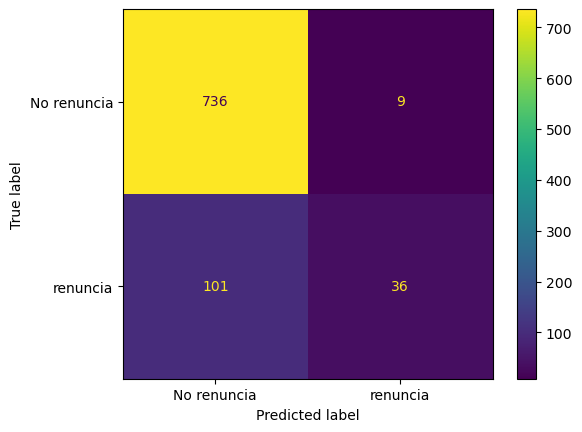

In [14]:
matriz= confusion_matrix(y_test, y_pred)
matriz_display = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No renuncia', 'renuncia'])
matriz_display.plot()
plt.show()

Metricas de desempeño

In [15]:
tn, fp, fn, tp = matriz.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.8
Recall: 0.26277372262773724
Especificidad: 0.9879194630872483
F1 score: 0.3956043956043957


## Modelo base con balaceno de clases

Construccion del modelo y exactitud en el entrenamiento

In [17]:
from sklearn.metrics import accuracy_score
X_train_std1=X_train_std.copy()
X_test_std1=X_test_std.copy()
# Entrenamiento del modelo
modelo1 = LogisticRegression(class_weight="balanced",random_state=142)

# Ajustar el modelo a los datos
modelo1.fit(X_train_std1, y_train)

# Desempeño en el entrenamiento
y_train_pred1 = modelo1.predict(X_train_std1)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred1) )

Exactitud en el entrenamiento: 0.746


 Exactitud en el validacion

In [18]:
y_pred1 = modelo1.predict(X_test_std1)

# Exactitud en el conjunto de validación
print('Exactitud en el validacion: %.3f'  %accuracy_score(y_test, y_pred1))

Exactitud en el validacion: 0.727


 Matriz de confusión

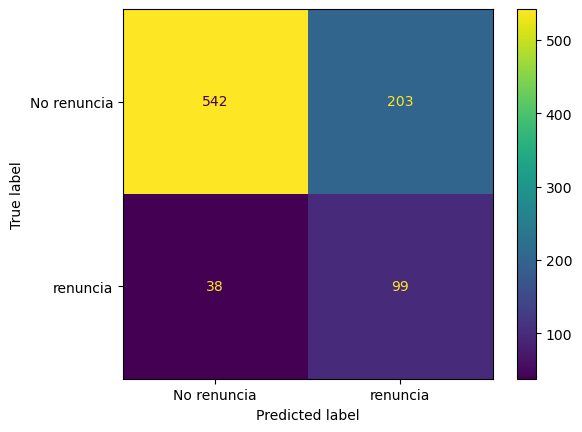

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz1= confusion_matrix(y_test, y_pred1)
matriz_display1 = ConfusionMatrixDisplay(confusion_matrix=matriz1, display_labels=['No renuncia', 'renuncia'])
matriz_display1.plot()
plt.show()

Metricas de desempeño

In [20]:
tn, fp, fn, tp = matriz1.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.32781456953642385
Recall: 0.7226277372262774
Especificidad: 0.72751677852349
F1 score: 0.45102505694760814


# Balanceo de clases manual

funcion smotetomek para el balanceo de clases

In [22]:
os_us = SMOTETomek()
x_train_res, y_train_res = os_us.fit_resample(X_train_std, y_train)

print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))

Distribution before resampling Counter({0: 2954, 1: 574})
Distribution after resampling Counter({0: 2954, 1: 2954})


# Seleccion de variables


## Metodo integrado 

In [23]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression,  f_classif, mutual_info_classif, chi2

In [24]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, Ridge

Seleccion de variables a partir del estimador lasso

In [25]:

sel_ = SelectFromModel(Lasso(alpha = 0.001, max_iter=10000), max_features=30) #entre mas aumente el parametro de serializacion, mas variables van atender a 0
sel_.fit(X_train_std, y_train)
print(sel_.estimator_.coef_)
#Obtener variables seleccionadas
X_new = sel_.get_support()#descarta los coeficientes mas cercanos a 0
X_train_base1 = X_train_std[:,X_new]
X_test_base1= X_test_std[:,X_new]
X_train.iloc[:,X_new]

[ 0.00000000e+00 -8.09014202e-03 -7.20146983e-03 -4.85837124e-03
  2.55275499e-02  5.83671196e-03 -0.00000000e+00 -5.02778669e-02
 -2.55821242e-02 -4.51421891e-02 -4.02117600e-02 -2.29026892e-02
 -6.01031728e-03  7.42880993e-02 -3.96647662e-02  8.66395040e-02
 -0.00000000e+00  7.39131691e-02 -0.00000000e+00 -0.00000000e+00
  9.34331285e-02  1.81261416e-02 -1.05640206e-04  6.43258113e-03
 -0.00000000e+00 -3.41353955e-02 -0.00000000e+00  0.00000000e+00
  1.33659522e-02 -0.00000000e+00 -3.12591719e-02  3.97031781e-02
  1.75360484e-02 -0.00000000e+00 -1.98809568e-02 -1.92607410e-02
 -0.00000000e+00  1.06924043e-01  0.00000000e+00 -0.00000000e+00
  3.35752820e-02  4.36289366e-02 -0.00000000e+00 -1.44410047e-02
 -5.63694074e-02]


,educacion,nivel_de_cargo,ingresos_mensuales,empresas_anteriores,porcentaje_aumentosalario,años_de_trabajo,años_jefe_actual,satisfaccion_entorno,satisfaccion_laboral,conciliacion_faimilar_laboral,...,nombre_cargo_Manufacturing Director,nombre_cargo_Research Director,nombre_cargo_Research Scientist,nombre_cargo_Sales Representative,estado_civil_Divorced,estado_civil_Single,numero_capacitaciones_2,numero_capacitaciones_3,numero_capacitaciones_5,numero_capacitaciones_6
1439,4,1,49680,1.0,19,11.0,1,2.0,4.0,3.0,...,0,0,0,0,0,0,0,0,0,0
598,3,5,83920,1.0,17,2.0,2,1.0,3.0,2.0,...,0,1,0,0,0,1,0,0,1,0
2790,3,1,88530,1.0,22,2.0,1,4.0,4.0,3.0,...,0,0,0,0,0,0,0,1,0,0
2252,4,1,31490,2.0,15,16.0,8,4.0,2.0,3.0,...,0,0,0,0,1,0,0,0,0,0
1323,4,5,55620,1.0,15,9.0,6,1.0,3.0,3.0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,4,1,48690,4.0,12,14.0,1,1.0,4.0,3.0,...,0,0,0,0,0,0,1,0,0,0
3723,2,1,176390,0.0,13,6.0,3,4.0,1.0,3.0,...,0,0,1,0,0,1,0,0,0,0
2080,3,2,23510,1.0,16,6.0,3,4.0,1.0,3.0,...,0,0,1,0,0,0,0,0,0,0
1956,3,2,44850,5.0,11,15.0,0,1.0,2.0,1.0,...,0,0,0,0,0,0,1,0,0,0


variables elegidas

In [26]:
X_train.iloc[:,X_new].columns

Index(['educacion', 'nivel_de_cargo', 'ingresos_mensuales',
       'empresas_anteriores', 'porcentaje_aumentosalario', 'años_de_trabajo',
       'años_jefe_actual', 'satisfaccion_entorno', 'satisfaccion_laboral',
       'conciliacion_faimilar_laboral', 'implicacion_laboral',
       'tiempo_prom_dia', 'frecuencia_viajes_Non-Travel',
       'frecuencia_viajes_Travel_Frequently', 'departamento_Human Resources',
       'formacion_Human Resources', 'formacion_Life Sciences',
       'formacion_Medical', 'formacion_Technical Degree',
       'nombre_cargo_Laboratory Technician',
       'nombre_cargo_Manufacturing Director', 'nombre_cargo_Research Director',
       'nombre_cargo_Research Scientist', 'nombre_cargo_Sales Representative',
       'estado_civil_Divorced', 'estado_civil_Single',
       'numero_capacitaciones_2', 'numero_capacitaciones_3',
       'numero_capacitaciones_5', 'numero_capacitaciones_6'],
      dtype='object')

## Método Wrapper 

Seleccion de variables por medio del seleccionador recursivo de skalearn

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LogisticRegression

# Función recursiva de selección de características
def recursive_feature_selection(X,y,model,k):
  rfe = RFE(model, n_features_to_select=k, step=1)
  fit = rfe.fit(X, y)
  X_new = fit.support_
  print("Num Features: %s" % (fit.n_features_))
  print("Selected Features: %s" % (fit.support_))
  print("Feature Ranking: %s" % (fit.ranking_))
  return X_new  

Variables elegidas por la funcion recursive_feature_selection

In [28]:
# Establecer Estimador
model = LogisticRegression(max_iter=100)
# Obtener columnas seleciconadas - (30 caracteristicas)
X_new_class = recursive_feature_selection(X_train_std, y_train, model, 30)

# Nuevo conjunto de datos
X_train_base2 = X_train_std[:,X_new_class]
X_test_base2= X_test_std[:,X_new_class]
X_train.iloc[:,X_new_class]

Num Features: 30
Selected Features: [False False False False  True False False  True  True  True  True  True
 False  True  True  True False  True  True  True  True False  True False
  True  True False False  True  True  True  True  True False  True  True
  True  True  True False  True  True False  True  True]
Feature Ranking: [15  8  5 12  1  9 14  1  1  1  1  1  4  1  1  1  2  1  1  1  1  3  1 10
  1  1 13  7  1  1  1  1  1 16  1  1  1  1  1 11  1  1  6  1  1]


,empresas_anteriores,años_de_trabajo,años_jefe_actual,satisfaccion_entorno,satisfaccion_laboral,conciliacion_faimilar_laboral,tiempo_prom_dia,frecuencia_viajes_Non-Travel,frecuencia_viajes_Travel_Frequently,departamento_Human Resources,...,nombre_cargo_Research Scientist,nombre_cargo_Sales Representative,estado_civil_Divorced,estado_civil_Married,estado_civil_Single,numero_capacitaciones_0,numero_capacitaciones_2,numero_capacitaciones_3,numero_capacitaciones_5,numero_capacitaciones_6
1439,1.0,11.0,1,2.0,4.0,3.0,6.0379,0,1,0,...,0,0,0,1,0,0,0,0,0,0
598,1.0,2.0,2,1.0,3.0,2.0,6.2960,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2790,1.0,2.0,1,4.0,4.0,3.0,7.1139,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2252,2.0,16.0,8,4.0,2.0,3.0,7.6645,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1323,1.0,9.0,6,1.0,3.0,3.0,7.8554,0,1,1,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,4.0,14.0,1,1.0,4.0,3.0,7.5739,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3723,0.0,6.0,3,4.0,1.0,3.0,5.9789,0,0,0,...,1,0,0,0,1,1,0,0,0,0
2080,1.0,6.0,3,4.0,1.0,3.0,6.8763,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1956,5.0,15.0,0,1.0,2.0,1.0,6.3820,0,0,0,...,0,0,0,1,0,0,1,0,0,0


Columnas elegidas

In [29]:
X_train.iloc[:,X_new_class].columns

Index(['empresas_anteriores', 'años_de_trabajo', 'años_jefe_actual',
       'satisfaccion_entorno', 'satisfaccion_laboral',
       'conciliacion_faimilar_laboral', 'tiempo_prom_dia',
       'frecuencia_viajes_Non-Travel', 'frecuencia_viajes_Travel_Frequently',
       'departamento_Human Resources', 'departamento_Research & Development',
       'departamento_Sales', 'formacion_Human Resources',
       'formacion_Marketing', 'formacion_Other', 'formacion_Technical Degree',
       'nombre_cargo_Laboratory Technician', 'nombre_cargo_Manager',
       'nombre_cargo_Manufacturing Director', 'nombre_cargo_Research Director',
       'nombre_cargo_Research Scientist', 'nombre_cargo_Sales Representative',
       'estado_civil_Divorced', 'estado_civil_Married', 'estado_civil_Single',
       'numero_capacitaciones_0', 'numero_capacitaciones_2',
       'numero_capacitaciones_3', 'numero_capacitaciones_5',
       'numero_capacitaciones_6'],
      dtype='object')

# Modelo 1 de Regresión Logística

### Modelo 1.1 Regresion logistica con Lasso

Construccion del modelo y exactitud en el entrenamiento 

In [30]:
from sklearn.metrics import accuracy_score

# Entrenamiento del modelo
modelo = LogisticRegression(random_state=142, class_weight='balanced')

# Ajustar el modelo a los datos
modelo.fit(X_train_base1, y_train)

# Desempeño en el entrenamiento
y_train_pred2 = modelo.predict(X_train_base1)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred2) )

Exactitud en el entrenamiento: 0.747


Exactitud en la validacion

In [31]:
y_pred = modelo.predict(X_test_base1)

# Exactitud en el conjunto de validación
print('Exactitud en la validacion: %.3f'  %accuracy_score(y_test, y_pred))

Exactitud en la validacion: 0.734


 Matriz de confusión

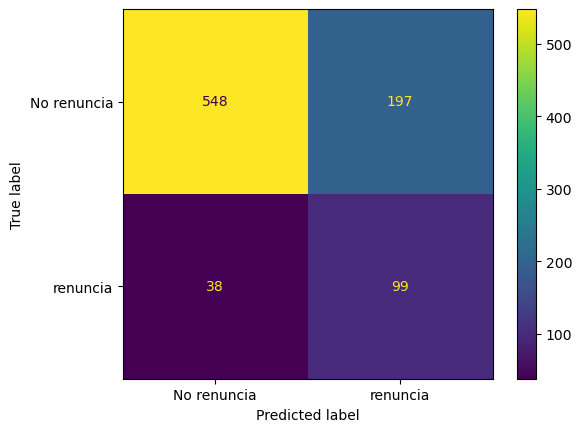

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz= confusion_matrix(y_test, y_pred)
matriz_display = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No renuncia', 'renuncia'])
matriz_display.plot()
plt.show()

Metricas de desempeño

In [33]:
tn, fp, fn, tp = matriz.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.3344594594594595
Recall: 0.7226277372262774
Especificidad: 0.7355704697986577
F1 score: 0.45727482678983833


### Modelo 1.2 regresion logistica con Wrapper

Construccion del modelo y exactitud en el entrenamiento

In [36]:
from sklearn.metrics import accuracy_score

# Entrenamiento del modelo
modelo = LogisticRegression(random_state=142, class_weight='balanced')

# Ajustar el modelo a los datos
modelo.fit(X_train_base2, y_train)

# Desempeño en el entrenamiento
y_train_pred2 = modelo.predict(X_train_base2)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred2) )

Exactitud en el entrenamiento: 0.741


Exactitud en la validacion

In [37]:
y_pred = modelo.predict(X_test_base2)

# Exactitud en el conjunto de validación
print('Exactitud en la validacion: %.3f'  %accuracy_score(y_test, y_pred))

Exactitud en la validacion: 0.723


Matriz de Confusión

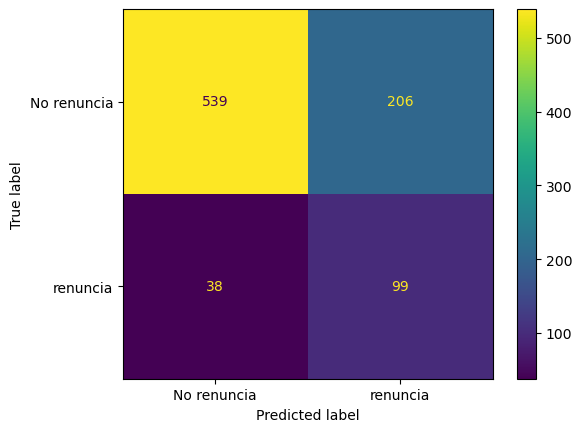

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz= confusion_matrix(y_test, y_pred)
matriz_display = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No renuncia', 'renuncia'])
matriz_display.plot()
plt.show()

Metricas de desempeño

In [39]:
tn, fp, fn, tp = matriz.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.32459016393442625
Recall: 0.7226277372262774
Especificidad: 0.723489932885906
F1 score: 0.44796380090497734


### Modelo 1.3 regresion logistica con balanceo de clases manual

 Construccion del modelo y xactitud en el entrenamiento 

In [41]:
from sklearn.metrics import accuracy_score

# Entrenamiento del modelo
modelo = LogisticRegression(random_state=142)

# Ajustar el modelo a los datos
modelo.fit(x_train_res, y_train_res)

# Desempeño en el entrenamiento
y_train_pred2 = modelo.predict(x_train_res)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train_res, y_train_pred2) )

Exactitud en el entrenamiento: 0.765


 Exactitud en la validación 

In [42]:
y_pred = modelo.predict(X_test_std)

# Exactitud en el conjunto de validación
print('Exactitud en la validacion: %.3f'  %accuracy_score(y_test, y_pred))

Exactitud en la validacion: 0.738


 Matriz de confusión 

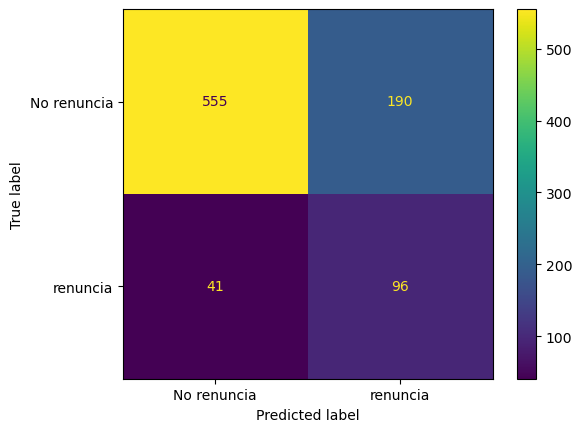

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz= confusion_matrix(y_test, y_pred)
matriz_display = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No renuncia', 'renuncia'])
matriz_display.plot()
plt.show()

Metricas de desempeño

In [44]:
tn, fp, fn, tp = matriz.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.3356643356643357
Recall: 0.7007299270072993
Especificidad: 0.7449664429530202
F1 score: 0.4539007092198582


# Modelo 2 Random Forest Classifier

### 2.1 Modelo random forest con metodo integrado

Construccion del modelo

In [45]:
from sklearn.ensemble import RandomForestClassifier
X_train_modelo3=X_train_base1
X_test_modelo3=X_test_base1

ranfor = RandomForestClassifier(class_weight="balanced",n_estimators = 150,criterion= 'gini', max_depth= 5,max_leaf_nodes = 10,n_jobs= -1,random_state = 123)
ranfor.fit(X_train_modelo3, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=10,
                       n_estimators=150, n_jobs=-1, random_state=123)

Metricas de desempeño

In [46]:

print ("Train - Accuracy :", metrics.accuracy_score(y_train, ranfor.predict(X_train_modelo3)))
print ("Train - classification report:\n", metrics.classification_report(y_train, ranfor.predict(X_train_modelo3)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, ranfor.predict(X_test_modelo3)))
print ("Test - classification report :", metrics.classification_report(y_test, ranfor.predict(X_test_modelo3)))

Train - Accuracy : 0.7939342403628118
Train - classification report:
               precision    recall  f1-score   support

           0       0.94      0.81      0.87      2954
           1       0.42      0.73      0.54       574

    accuracy                           0.79      3528
   macro avg       0.68      0.77      0.70      3528
weighted avg       0.86      0.79      0.81      3528

Test - Accuracy : 0.8027210884353742
Test - classification report :               precision    recall  f1-score   support

           0       0.93      0.83      0.88       745
           1       0.42      0.68      0.52       137

    accuracy                           0.80       882
   macro avg       0.68      0.75      0.70       882
weighted avg       0.85      0.80      0.82       882



 Matriz de confusión 

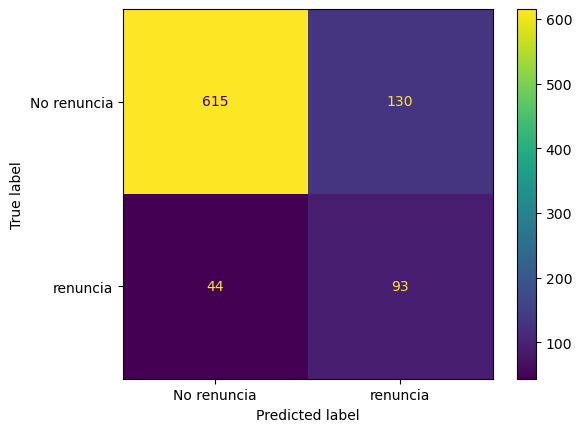

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm= confusion_matrix(y_test, ranfor.predict(X_test_modelo3))
# Visualización de la matriz de confusion
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['No renuncia', 'renuncia'])
cm_display.plot()
plt.show()

### Modelo con tuning de hiperparametros

Cuadricula de hiperparametros

In [48]:
parameters = {'max_depth': [ 1, 3, 5, 7],
              'max_features': [0.05,0.4, 1],
              'max_leaf_nodes': [4,7,9, 15],
              'min_samples_leaf': [0.5, 1,3,5],
              'n_estimators': [10, 20, 30, 40]}

Busqueda en cuadricula

In [49]:
#Definición del modelo
ranfor = RandomForestClassifier(random_state = 123)

grid_search = GridSearchCV(ranfor, parameters, scoring='r2', cv=5, n_jobs=-1)

# Iniciamos la busqueda
grid_result = grid_search.fit(X_train_modelo3, y_train)

print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)

Best Params:  {'max_depth': 5, 'max_features': 0.4, 'max_leaf_nodes': 15, 'min_samples_leaf': 5, 'n_estimators': 10}
Best Score:  -0.03409489706257858


Construccion del modelo

In [50]:
from sklearn.ensemble import RandomForestClassifier
X_train_modelo3=X_train_base1
X_test_modelo3=X_test_base1

ranfor = RandomForestClassifier(class_weight="balanced", max_features=0.4, n_estimators = 10, max_depth= 5,max_leaf_nodes = 15, min_samples_leaf=3, n_jobs= -1,random_state = 123)
ranfor.fit(X_train_modelo3, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=0.4,
                       max_leaf_nodes=15, min_samples_leaf=3, n_estimators=10,
                       n_jobs=-1, random_state=123)

Metricas de desempeño

In [51]:

print ("Train - Accuracy :", metrics.accuracy_score(y_train, ranfor.predict(X_train_modelo3)))
print ("Train - classification report:\n", metrics.classification_report(y_train, ranfor.predict(X_train_modelo3)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, ranfor.predict(X_test_modelo3)))
print ("Test - classification report :", metrics.classification_report(y_test, ranfor.predict(X_test_modelo3)))

Train - Accuracy : 0.7947845804988662
Train - classification report:
               precision    recall  f1-score   support

           0       0.94      0.81      0.87      2954
           1       0.42      0.72      0.53       574

    accuracy                           0.79      3528
   macro avg       0.68      0.77      0.70      3528
weighted avg       0.85      0.79      0.81      3528

Test - Accuracy : 0.8027210884353742
Test - classification report :               precision    recall  f1-score   support

           0       0.93      0.83      0.88       745
           1       0.41      0.65      0.51       137

    accuracy                           0.80       882
   macro avg       0.67      0.74      0.69       882
weighted avg       0.85      0.80      0.82       882



Eleccion de variable mas importante

Text(0.5, 0, 'Random Forest Feature Importance')

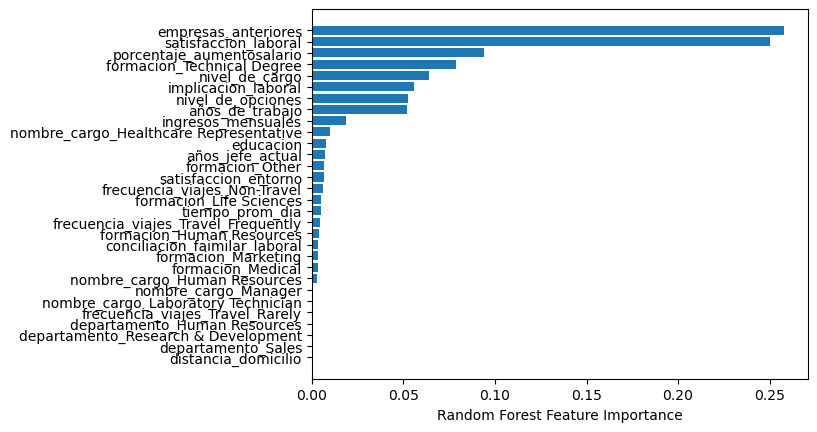

In [157]:
importance = ranfor.feature_importances_
sorted_idx = ranfor.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], importance[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### 2.2 Modelo random forest con metodo wrapper

Construccion del modelo

In [52]:
from sklearn.ensemble import RandomForestClassifier
X_train_modelo3_2=X_train_base2
X_test_modelo3_2=X_test_base2

ranfor = RandomForestClassifier(class_weight="balanced",n_estimators = 150,criterion= 'gini', max_depth= 5,max_leaf_nodes = 10,n_jobs= -1,random_state = 123)
ranfor.fit(X_train_modelo3_2, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=10,
                       n_estimators=150, n_jobs=-1, random_state=123)

Metricas de desempeño

In [53]:

print ("Train - Accuracy :", metrics.accuracy_score(y_train, ranfor.predict(X_train_modelo3_2)))
print ("Train - classification report:\n", metrics.classification_report(y_train, ranfor.predict(X_train_modelo3_2)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, ranfor.predict(X_test_modelo3_2)))
print ("Test - classification report :", metrics.classification_report(y_test, ranfor.predict(X_test_modelo3_2)))

Train - Accuracy : 0.7953514739229025
Train - classification report:
               precision    recall  f1-score   support

           0       0.94      0.81      0.87      2954
           1       0.42      0.72      0.53       574

    accuracy                           0.80      3528
   macro avg       0.68      0.77      0.70      3528
weighted avg       0.85      0.80      0.81      3528

Test - Accuracy : 0.7959183673469388
Test - classification report :               precision    recall  f1-score   support

           0       0.93      0.82      0.87       745
           1       0.41      0.68      0.51       137

    accuracy                           0.80       882
   macro avg       0.67      0.75      0.69       882
weighted avg       0.85      0.80      0.81       882



 Matriz de Confusión

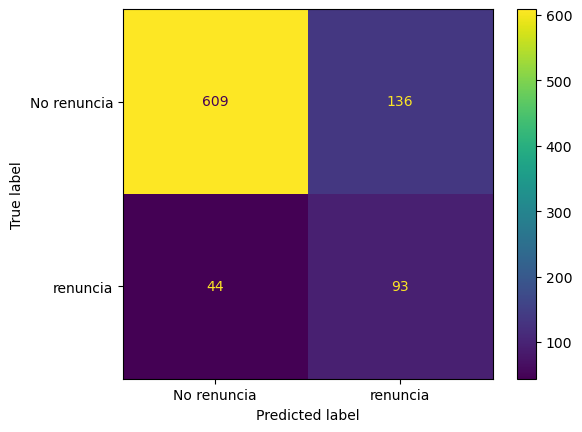

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm= confusion_matrix(y_test, ranfor.predict(X_test_modelo3_2))
# Visualización de la matriz de confusion
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm,  display_labels=['No renuncia', 'renuncia'])
cm_display.plot()
plt.show()

# Modelo 3 Gradient Boosting Classifier

### 3.1 Modelo de Gradient Boosting con metodo integrado

Construccion del modelo

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
X_train_modelo4= x_train_res[:, X_new]
X_test_modelo4 = X_test_std[:, X_new]
gboos = GradientBoostingClassifier( n_estimators = 100, learning_rate= 0.1, max_features = 4, random_state = 123)
gboos.fit(X_train_modelo4, y_train_res)

GradientBoostingClassifier(max_features=4, random_state=123)

Metricas de desempeño

In [56]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train_res, gboos.predict(X_train_modelo4)))
print ("Train - classification report:\n", metrics.classification_report(y_train_res, gboos.predict(X_train_modelo4)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, gboos.predict(X_test_modelo4)))
print ("Test - classification report :", metrics.classification_report(y_test, gboos.predict(X_test_modelo4)))

Train - Accuracy : 0.8992890995260664
Train - classification report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      2954
           1       0.91      0.89      0.90      2954

    accuracy                           0.90      5908
   macro avg       0.90      0.90      0.90      5908
weighted avg       0.90      0.90      0.90      5908

Test - Accuracy : 0.8741496598639455
Test - classification report :               precision    recall  f1-score   support

           0       0.93      0.92      0.92       745
           1       0.59      0.65      0.62       137

    accuracy                           0.87       882
   macro avg       0.76      0.78      0.77       882
weighted avg       0.88      0.87      0.88       882



 Matriz de confusión

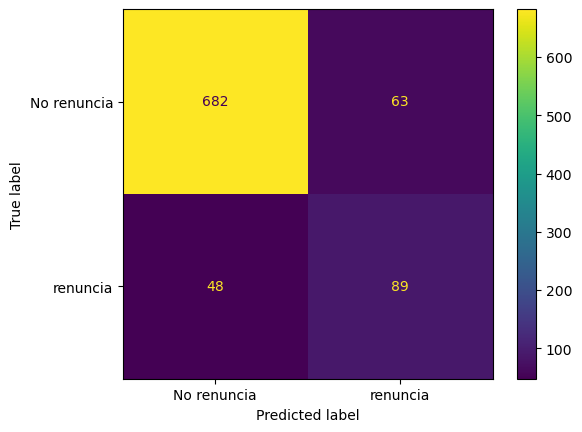

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm1= confusion_matrix(y_test, gboos.predict(X_test_modelo4))
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1,  display_labels=['No renuncia', 'renuncia'])
cm1_display.plot()
plt.show()

Curva ROC

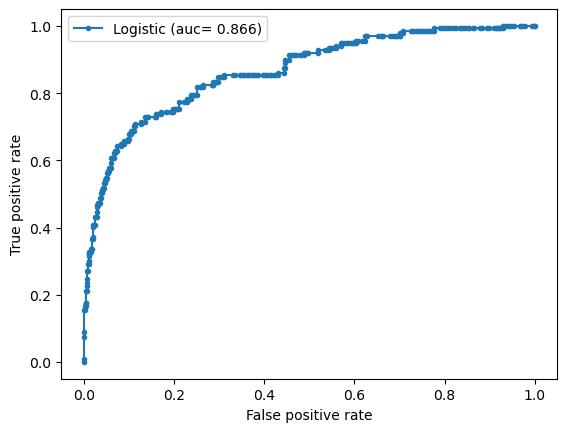

In [58]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_pred = gboos.predict_proba(X_test_modelo4)[::,1]
fpr, tpr,_ =roc_curve(y_test, y_pred)
# auc=auc(fpr, tpr) #opción 1
auc = roc_auc_score(y_test, y_pred) #opción 2
plt.plot(fpr, tpr,marker='.',label='Logistic (auc= %0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

### Modelo con tunning de hiperparametros

Cuadricula de hiperparametros

In [59]:
parameters = {'learning_rate': [0.05, 0.1,0.3],
              'max_features': [2, 4, 6, 8],
              'max_depth': [4,6,8,10,12],
              'n_estimators': [80, 100, 150, 200]}

Busqueda en cuadricula

In [60]:
#Definición del modelo
from sklearn.ensemble import GradientBoostingClassifier
ranfor = GradientBoostingClassifier(random_state = 123)

grid_search = GridSearchCV(ranfor, parameters, scoring='r2', cv=5, n_jobs=-1)

# Iniciamos la busqueda
grid_result = grid_search.fit(X_train_modelo4, y_train_res)

print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)

Best Params:  {'learning_rate': 0.3, 'max_depth': 10, 'max_features': 2, 'n_estimators': 80}
Best Score:  0.969539705755829


Construccion del modelo

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
X_train_modelo4= x_train_res[:, X_new]
X_test_modelo4 = X_test_std [:, X_new]
gboos = GradientBoostingClassifier( n_estimators = 150, max_depth= 12, learning_rate= 0.3, max_features = 2, random_state = 123)
gboos.fit(X_train_modelo4, y_train_res)

GradientBoostingClassifier(learning_rate=0.3, max_depth=12, max_features=2,
                           n_estimators=150, random_state=123)

Metricas de desempeño

In [62]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train_res, gboos.predict(X_train_modelo4)))
print ("Train - classification report:\n", metrics.classification_report(y_train_res, gboos.predict(X_train_modelo4)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, gboos.predict(X_test_modelo4)))
print ("Test - classification report :", metrics.classification_report(y_test, gboos.predict(X_test_modelo4)))

Train - Accuracy : 1.0
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2954
           1       1.00      1.00      1.00      2954

    accuracy                           1.00      5908
   macro avg       1.00      1.00      1.00      5908
weighted avg       1.00      1.00      1.00      5908

Test - Accuracy : 0.9965986394557823
Test - classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       745
           1       1.00      0.98      0.99       137

    accuracy                           1.00       882
   macro avg       1.00      0.99      0.99       882
weighted avg       1.00      1.00      1.00       882



Matriz de confusión 

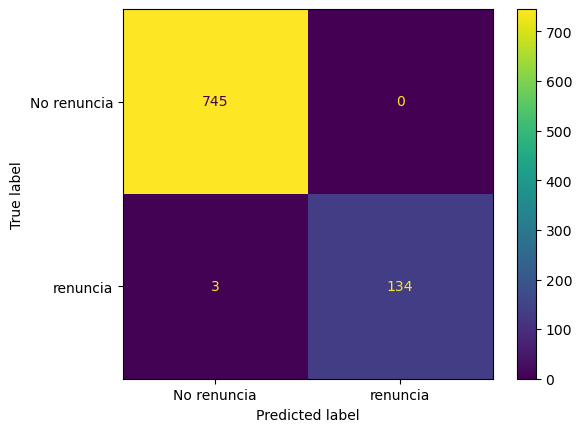

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm1= confusion_matrix(y_test, gboos.predict(X_test_modelo4))
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1,  display_labels=['No renuncia', 'renuncia'])
cm1_display.plot()
plt.show()

Curva ROC

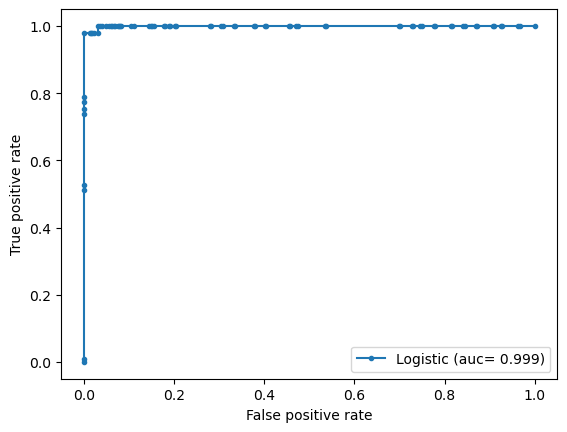

In [64]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_pred = gboos.predict_proba(X_test_modelo4)[::,1]
fpr, tpr,_ =roc_curve(y_test, y_pred)
# auc=auc(fpr, tpr) #opción 1
auc = roc_auc_score(y_test, y_pred) #opción 2
plt.plot(fpr, tpr,marker='.',label='Logistic (auc= %0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

### 3.2 Modelo de Gradient Boosting con metodo wrapper

Construccion del modelo

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
X_train_modelo4_2= x_train_res[:, X_new_class]
X_test_modelo4_2 = X_test_std[:, X_new_class]
gboos = GradientBoostingClassifier( n_estimators = 100, learning_rate= 0.1, max_features = 4, random_state = 123)
gboos.fit(X_train_modelo4_2, y_train_res)

GradientBoostingClassifier(max_features=4, random_state=123)

Metricas de desempeño

In [66]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train_res, gboos.predict(X_train_modelo4_2)))
print ("Train - classification report:\n", metrics.classification_report(y_train_res, gboos.predict(X_train_modelo4_2)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, gboos.predict(X_test_modelo4_2)))
print ("Test - classification report :", metrics.classification_report(y_test, gboos.predict(X_test_modelo4_2)))

Train - Accuracy : 0.8945497630331753
Train - classification report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      2954
           1       0.90      0.88      0.89      2954

    accuracy                           0.89      5908
   macro avg       0.89      0.89      0.89      5908
weighted avg       0.89      0.89      0.89      5908

Test - Accuracy : 0.8775510204081632
Test - classification report :               precision    recall  f1-score   support

           0       0.94      0.92      0.93       745
           1       0.59      0.66      0.63       137

    accuracy                           0.88       882
   macro avg       0.77      0.79      0.78       882
weighted avg       0.88      0.88      0.88       882



Matriz de confusión 

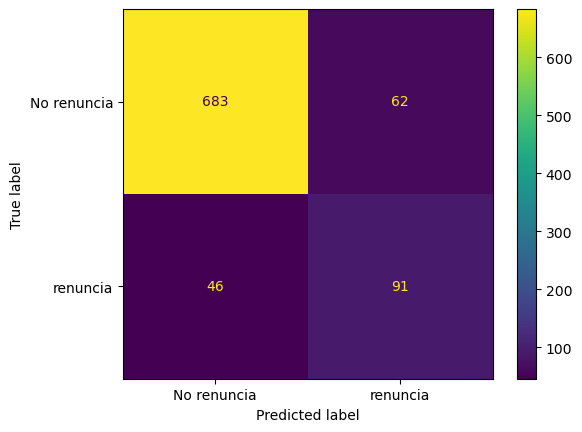

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm1= confusion_matrix(y_test, gboos.predict(X_test_modelo4_2))
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1,  display_labels=['No renuncia', 'renuncia'])
cm1_display.plot()
plt.show()

# Modelo 4 Support Vector Machine 

### 4.1 Modelo de support vector machine con metodo integrado

Construccion del modelo

In [68]:
from sklearn.svm import SVC
X_train_modelo5=X_train_base1
X_test_modelo5=X_test_base1
svm_model = SVC(C = 1.5, kernel = 'linear', class_weight = 'balanced', max_iter =-1, random_state=123)
svm_model.fit(X_train_modelo5, y_train)

SVC(C=1.5, class_weight='balanced', kernel='linear', random_state=123)

Metricas de desempeño

In [69]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train, svm_model.predict(X_train_modelo5)))
print ("Train - classification report:\n", metrics.classification_report(y_train, svm_model.predict(X_train_modelo5)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, svm_model.predict(X_test_modelo5)))
print ("Test - classification report :", metrics.classification_report(y_test, svm_model.predict(X_test_modelo5)))

Train - Accuracy : 0.7417800453514739
Train - classification report:
               precision    recall  f1-score   support

           0       0.94      0.74      0.83      2954
           1       0.36      0.77      0.49       574

    accuracy                           0.74      3528
   macro avg       0.65      0.75      0.66      3528
weighted avg       0.85      0.74      0.77      3528

Test - Accuracy : 0.7324263038548753
Test - classification report :               precision    recall  f1-score   support

           0       0.94      0.73      0.82       745
           1       0.33      0.72      0.46       137

    accuracy                           0.73       882
   macro avg       0.63      0.73      0.64       882
weighted avg       0.84      0.73      0.77       882



Matriz de confusión 

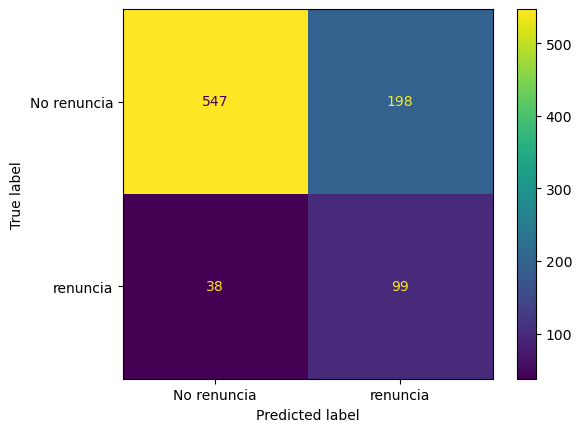

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm1= confusion_matrix(y_test, svm_model.predict(X_test_modelo5))
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1,  display_labels=['No renuncia', 'renuncia'])
cm1_display.plot()
plt.show()

### Modelo support vector machine con hiperparametros optimizados

Cuadricula de hiperparametros

In [71]:
parameters = {'kernel': ['linear', 'poly', 'sigmoid', 'rbf'],
              'C': [-1,0.01, 0.08, 1.5, 3], 
              'max_iter': [-1, 0.08, 1, 5, 10],} 

Busqueda en cuadricula

In [72]:
#Definición del modelo
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
ranfor = SVC(random_state = 123)

grid_search = GridSearchCV(ranfor, parameters, scoring='r2', cv=5, n_jobs=-1)

# Iniciamos la busqueda
grid_result = grid_search.fit(X_train_modelo5, y_train)

print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)

Best Params:  {'C': 3, 'kernel': 'poly', 'max_iter': -1}
Best Score:  0.6399987714724081


Construccion del modelo

In [73]:
from sklearn.svm import SVC
X_train_modelo5=X_train_base1
X_test_modelo5=X_test_base1
svm_model = SVC(C = 3, kernel = 'rbf', class_weight = 'balanced', max_iter =-1, random_state=123)
svm_model.fit(X_train_modelo5, y_train)

SVC(C=3, class_weight='balanced', random_state=123)

Metricas de desempeño

In [74]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train, svm_model.predict(X_train_modelo5)))
print ("Train - classification report:\n", metrics.classification_report(y_train, svm_model.predict(X_train_modelo5)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, svm_model.predict(X_test_modelo5)))
print ("Test - classification report :", metrics.classification_report(y_test, svm_model.predict(X_test_modelo5)))

Train - Accuracy : 0.9923469387755102
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      2954
           1       0.96      1.00      0.98       574

    accuracy                           0.99      3528
   macro avg       0.98      0.99      0.99      3528
weighted avg       0.99      0.99      0.99      3528

Test - Accuracy : 0.9773242630385488
Test - classification report :               precision    recall  f1-score   support

           0       0.99      0.98      0.99       745
           1       0.89      0.97      0.93       137

    accuracy                           0.98       882
   macro avg       0.94      0.97      0.96       882
weighted avg       0.98      0.98      0.98       882



###  4.2 Modelo support vector machine con metodo wrapper


Construccion del modelo

In [75]:
from sklearn.svm import SVC
X_train_modelo5_2=X_train_base2
X_test_modelo5_2=X_test_base2
svm_model = SVC(C = 1.5, kernel = 'linear', class_weight = 'balanced', max_iter =-1, random_state=123)
svm_model.fit(X_train_modelo5_2, y_train)

SVC(C=1.5, class_weight='balanced', kernel='linear', random_state=123)

Metricas de desempeño

In [76]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train, svm_model.predict(X_train_modelo5_2)))
print ("Train - classification report:\n", metrics.classification_report(y_train, svm_model.predict(X_train_modelo5_2)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, svm_model.predict(X_test_modelo5_2)))
print ("Test - classification report :", metrics.classification_report(y_test, svm_model.predict(X_test_modelo5_2)))

Train - Accuracy : 0.735827664399093
Train - classification report:
               precision    recall  f1-score   support

           0       0.94      0.73      0.82      2954
           1       0.35      0.76      0.48       574

    accuracy                           0.74      3528
   macro avg       0.65      0.74      0.65      3528
weighted avg       0.84      0.74      0.77      3528

Test - Accuracy : 0.7154195011337868
Test - classification report :               precision    recall  f1-score   support

           0       0.93      0.71      0.81       745
           1       0.32      0.72      0.44       137

    accuracy                           0.72       882
   macro avg       0.63      0.72      0.63       882
weighted avg       0.84      0.72      0.75       882



Matriz de confusión 

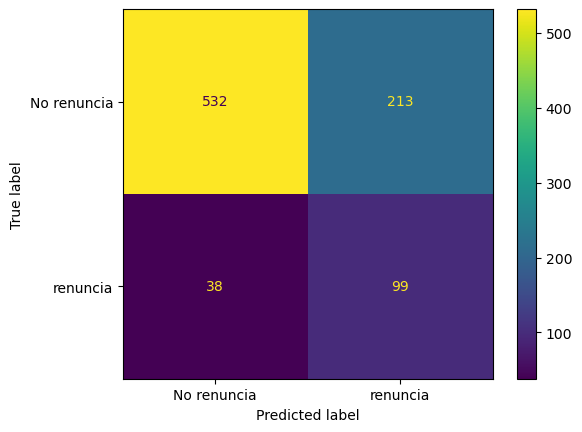

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm1= confusion_matrix(y_test, svm_model.predict(X_test_modelo5_2))
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels=['No renuncia', 'renuncia'])
cm1_display.plot()
plt.show()

# ANALISIS DE RESULTADOS

![Alt text](image.png)